In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

## Dictionnaries of performance

In [3]:
human_performance = {'alien': 6875.,
                     'boxing': 4.3,
                     'breakout': 31.8,
                     'pong': 9.3,
                     'space_invaders': 1652,}

In [4]:
random_performance = {'alien': 227.8,
                      'boxing': 0.1,
                      'breakout': 1.7,
                      'pong': -20.7,
                      'space_invaders': 148,}

## Functions

In [33]:
def df_results(history, human_perf: float, random_perf: float,
               step_test: int, begin_test: int, end_test: int,
               name_model: str='model'):
    
    """
    """
    points_test = [i for i in range(begin_test, end_test + step_test, step_test)]
    avg_reward_perc_human = [(k-random_perf)/(human_perf-random_perf)*100 for k in history['avg_reward']]
    avg_reward_perc_rand = [k/random_perf*100 for k in history['avg_reward']]
    l_name_model = [name_model]*len(points_test)
    
    return pd.DataFrame(data={
        'name_model': l_name_model,
        'points_test': points_test,
        'avg_reward': history['avg_reward'],
        'avg_Q': history['avg_Q'],
        'avg_reward_normalized_human': avg_reward_perc_human,
        'avg_reward_perc_rand': avg_reward_perc_rand,
    })

## Visualization of agents' performance

In [5]:
spaceinvaders_history = pickle.load(open('data/space_invaders_T55000_strtTrain200_steps10000.p', 'rb'))

In [6]:
spaceinvaders_reward = spaceinvaders_history['reward']
spaceinvaders_avg_reward = spaceinvaders_history['avg_reward']
spaceinvaders_avg_Q = spaceinvaders_history['avg_Q']

Text(0, 0.5, 'Reward')

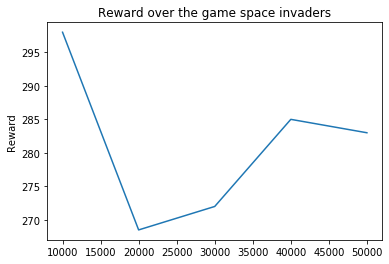

In [7]:
plt.plot([10000, 20000, 30000, 40000, 50000], spaceinvaders_avg_reward)
plt.title('Reward over the game space invaders')
plt.ylabel('Reward')

In [8]:
alien_history = pickle.load(open('data/alien_T305000_strtTrain200_steps10000.p', 'rb'))

In [10]:
alien_reward = alien_history['reward']
alien_avg_reward = alien_history['avg_reward']
alien_avg_Q = alien_history['avg_Q']

Text(0, 0.5, 'Reward')

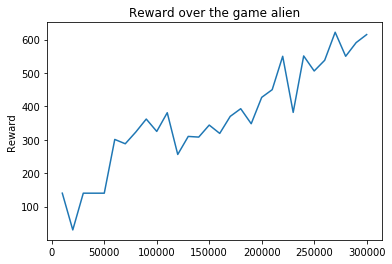

In [11]:
plt.plot([i for i in range(10000, 310000, 10000)], alien_avg_reward)
plt.title('Reward over the game alien')
plt.ylabel('Reward')

In [34]:
df_alien = df_results(alien_history, human_performance['alien'], random_performance['alien'],
                    step_test=10000, begin_test=10000, end_test=300000,
                    name_model='Rainbow_alien')

Text(0, 0.5, 'Normalized reward')

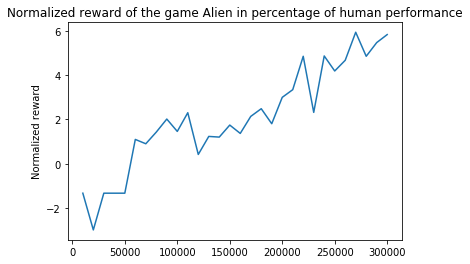

In [38]:
plt.plot(df_alien['points_test'], df_alien['avg_reward_normalized_human'])
plt.title('Normalized reward of the game Alien in percentage of human performance')
plt.ylabel('Normalized reward')

Text(0, 0.5, 'Reward in percentage of random performance')

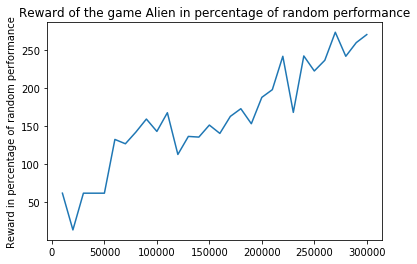

In [37]:
plt.plot(df_alien['points_test'], df_alien['avg_reward_perc_rand'])
plt.title('Reward of the game Alien in percentage of random performance')
plt.ylabel('Reward in percentage of random performance')